<a href="https://colab.research.google.com/github/bselin/ANN-Applications-MLP-Keras-GRNN-RBF/blob/main/final_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error 

dataset=pd.read_csv('/content/drive/MyDrive/final_istanbul_traffic_hourly - 1.csv',delimiter=',') 
dataset

,DATE_TIME,NUMBER_OF_VEHICLES,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NEXT_HOUR_AVG_SPEED
0,2020-09-07 06:00:00,47,8,80,40,30
1,2020-09-07 07:00:00,81,6,80,30,33
2,2020-09-07 08:00:00,115,8,80,33,28
3,2020-09-07 09:00:00,102,6,76,28,32
4,2020-09-07 10:00:00,106,6,72,32,33
...,...,...,...,...,...,...
13304,2020-10-30 13:00:00,85,6,65,22,22
13305,2020-10-30 14:00:00,89,6,62,22,19
13306,2020-10-30 15:00:00,77,5,46,19,21
13307,2020-10-30 16:00:00,81,6,43,21,22


In [11]:
#generate the dataset with the necessary columns only
dataset=dataset[['MINIMUM_SPEED', 'MAXIMUM_SPEED', 'AVERAGE_SPEED','NUMBER_OF_VEHICLES','NEXT_HOUR_AVG_SPEED']]
dataset


,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,NEXT_HOUR_AVG_SPEED
0,8,80,40,47,30
1,6,80,30,81,33
2,8,80,33,115,28
3,6,76,28,102,32
4,6,72,32,106,33
...,...,...,...,...,...
13304,6,65,22,85,22
13305,6,62,22,89,19
13306,5,46,19,77,21
13307,6,43,21,81,22


In [12]:
#indexing X as input variables: maximum speed,average speed and number of vehicles at that hour.
#indexing Y as target variable: next hour's average speed
X = np.array(dataset.iloc[:,1:4])
Y = np.array([dataset.iloc[:,4]])
L = len(dataset)
Y= Y[:,0:L]
print('initial shapes of the input and output: \n ' ,X.shape,Y.shape)
Y = np.transpose(Y)
#final X and Y
print('final shapes of the input and output: \n' , X.shape,Y.shape)
print('input: \n', X, '\n target: \n ',Y)

initial shapes of the input and output: 
  (13309, 3) (1, 13309)
final shapes of the input and output: 
 (13309, 3) (13309, 1)
input: 
 [[ 80  40  47]
 [ 80  30  81]
 [ 80  33 115]
 ...
 [ 46  19  77]
 [ 43  21  81]
 [ 50  22  68]] 
 target: 
  [[30]
 [33]
 [28]
 ...
 [21]
 [22]
 [23]]


In [13]:
#scaling the input and output to train the model correct 
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
 

print(X,Y)

[[0.33333333 0.4057971  0.07100592]
 [0.33333333 0.26086957 0.13806706]
 [0.33333333 0.30434783 0.20512821]
 ...
 [0.06349206 0.10144928 0.13017751]
 [0.03968254 0.13043478 0.13806706]
 [0.0952381  0.14492754 0.11242604]] [[30]
 [33]
 [28]
 ...
 [21]
 [22]
 [23]]


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state=0)

In [15]:
from sklearn.model_selection import GridSearchCV

model = MLPRegressor(max_iter=100)

param_grid = {"hidden_layer_sizes": [(128,64),(10,15)], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["adam"], "alpha": [0.00005,0.05,0.0005]}
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: -11.624670 using {'activation': 'relu', 'alpha': 5e-05, 'hidden_layer_sizes': (128, 64), 'solver': 'adam'}
-12.376549 (1.528693) with: {'activation': 'identity', 'alpha': 5e-05, 'hidden_layer_sizes': (128, 64), 'solver': 'adam'}
-12.273378 (1.383479) with: {'activation': 'identity', 'alpha': 5e-05, 'hidden_layer_sizes': (10, 15), 'solver': 'adam'}
-12.309201 (1.486750) with: {'activation': 'identity', 'alpha': 0.05, 'hidden_layer_sizes': (128, 64), 'solver': 'adam'}
-12.264970 (1.381371) with: {'activation': 'identity', 'alpha': 0.05, 'hidden_layer_sizes': (10, 15), 'solver': 'adam'}
-12.463064 (1.527765) with: {'activation': 'identity', 'alpha': 0.0005, 'hidden_layer_sizes': (128, 64), 'solver': 'adam'}
-12.330036 (1.451902) with: {'activation': 'identity', 'alpha': 0.0005, 'hidden_layer_sizes': (10, 15), 'solver': 'adam'}
-14.521406 (1.777612) with: {'activation': 'logistic', 'alpha': 5e-05, 'hidden_layer_sizes': (128, 64), 'solver': 'adam'}
-79.918061 (2.970445) with: {'activa

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
#putting the best model parameters into the model (after Grid Search CV is applied)

mlp = MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(128,64), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
mlp
mlp.fit(X_train,Y_train)
predictions = mlp.predict(X_test)
predictions1=mlp.predict(X_train)

print("mse_test :" ,mean_squared_error(Y_test,predictions), "mse_train :",mean_squared_error(Y_train,predictions1))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mse_test : 11.645390950508554 mse_train : 11.466360020293259


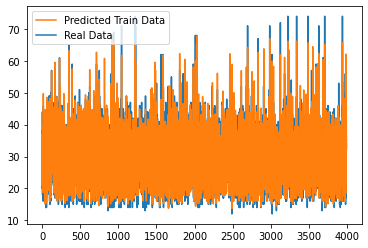

In [17]:

plt.figure(3)
Test,= plt.plot(Y_test)
Prediction, = plt.plot(predictions)
plt.legend([Prediction,Test],["Predicted Train Data","Real Data"])
plt.show()

In [18]:
#prediction for the unseen data
Xnew=[[79,	38,	46],
[73,	32,	79],
[72,	33,	97],
[71,	29,	103],
[72	,32	,116],
[72,	32,	107],
[70,	31,	101],
[69,	29,	111],
[65,	28,	115],
[60,	24,	111],
[57,	19,	130],
[59,	16,	114]]
Xnew = scaler.transform(Xnew)
a=mlp.predict(Xnew)
print("prediction for that input is" , a)




prediction for that input is [35.55918742 31.01246655 31.5950179  28.47300943 30.87737771 30.89429811
 30.09260459 28.37334793 27.35626329 23.36337064 18.557043   15.98131929]
